<a id='TOC'></a>

## TOC:

* [Data Preparation, Analysis, and Visualizations](#Data_Exploration)
* [Model (CNN without stride) Training](#CNN)
* [Model Analysis (CNN without stride) (Metrices)](#metrices_CNN)
* [Model (Strided CNN) Training](#stridedCNN)
* [Model Analysis (Strided CNN) (Metrices)](#metrices_stridedCNN)
* [Model (CNN with Pooling) Training Training](#CNN_pool)
* [Model Analysis (CNN with Pooling) (Metrices)](#metrices_CNN_pool)
* [Model (add Data Augmentation) Training](#DataAugmentation)
* [Model Analysis (add Data Augmentation) (Metrices)](#metricesAugmentation)
* [Model (add Batch Normalization) Training](#BatchNormalization)
* [Model Analysis (add Batch Normalization) (Metrices)](#metricesBatchNormalization)

In [43]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

# load the required modules to use the Functional API approach
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, Dropout
from tensorflow.keras.layers import MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

<a id='Data_Exploration'></a>

In [2]:
# read in the CIFAR-10 dataset from keras repository
CIFAR10 = tf.keras.datasets.cifar10
(X_train, y_train), (X_test, y_test) = CIFAR10.load_data()

In [3]:
print(np.shape(X_train), np.shape(y_train), np.shape(y_test), np.shape(X_test))

(50000, 32, 32, 3) (50000, 1) (10000, 1) (10000, 32, 32, 3)


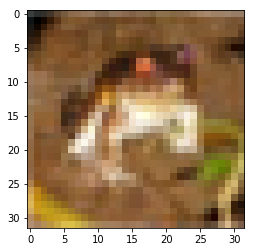

In [4]:
plt.imshow(X_train[0])

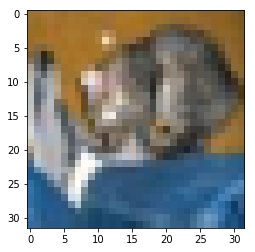

In [5]:
plt.imshow(X_test[0])

In [6]:
# rescale the color range from [0, 255] to [0, 1]
X_train = X_train/255
X_test = X_test/255

In [7]:
# in order for the model to read the labels, they have to be flatten
y_train = y_train.flatten()
y_test = y_test.flatten()

In [8]:
# read in the number of classes for classification (last layer)
cls = len(set(y_test.flatten()))
print('Number of classes: {}'.format(cls))

Number of classes: 10


In [49]:
print(np.shape(X_train), np.shape(y_train), np.shape(y_test), np.shape(X_test))

(50000, 32, 32, 3) (50000,) (10000,) (10000, 32, 32, 3)


<a id='CNN'></a>
CNN model without stride

In [51]:
# make the model using the Functional API approach
# In the first LAYER => Input needs the shape of A SINGLE FIGURE
# in this case np.shape(X_train[0]) = (32, 32, 3)
i = Input(shape=np.shape(X_train[0]))
x = Conv2D(32, (3, 3), activation='relu')(i)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(cls, activation='softmax')(x)

In [52]:
# make the model
model = Model(i, x)

# compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# fit the model to the training data
# and validate the model against validation data
# batchsize = number of batches for each SGD step in the training
model.fit(X_train[:10000], y_train[:10000], 
          validation_data=(X_test[:2000], y_test[:2000]), 
          epochs=20, 
          batch_size=128)

Train on 10000 samples, validate on 2000 samples
Epoch 1/20
 8064/10000 [=======================>......] - ETA: 25s - loss: 2.0616 - accuracy: 0.2733

KeyboardInterrupt: 

In [ ]:
# plot the loss and validation loss to observe the model performance
plt.plot(model.history.history['loss'], label='loss')
plt.plot(model.history.history['val_loss'], label='validation loss')
plt.legend()

In [ ]:
# plot the accuracy on Train and Test to observe the model performance
plt.plot(model.history.history['accuracy'], label='accuracy')
plt.plot(model.history.history['val_accuracy'], 
         label='validation accuracy')
plt.legend()

<a id='metrices_stridedCNN'></a>
General overview of the  CNN model performance without Strid using Confusion Metrix.

In [ ]:
# 

from sklearn.metrics import confusion_matrix
import itertools

def my_confusion_matrix(con_mat, cls, title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    This Function shows the confusion matrix in a nice format and color.
        
    return:
        It returns nothing and only plot the matrix in a nice format.
    """
    
    #print(con_mat)
    
    plt.figure(figsize=(10,7))
    plt.imshow(con_mat, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    plt.xticks(np.arange(10))
    plt.yticks(np.arange(10))
    
    plt.xlabel('predicted number')
    plt.ylabel('actual number')
    
    #print(range(con_mat.shape[0], con_mat.shape[1]))
    for i, j in itertools.product(range(con_mat.shape[0]), range(con_mat.shape[1])):
        #print(con_mat[i,j])
        plt.text(j, i, con_mat[i,j], 
                 horizontalalignment='center', 
                 color='white' if  i==j else 'black')
    
    plt.tight_layout()
    plt.show()
    
pred = model.predict(X_test)
print(pred[0])

pred_arg = pred.argmax(axis=1)
print(pred_arg[0])

con_mat = confusion_matrix(y_test, pred_arg)
print(con_mat)

my_confusion_matrix(con_mat, list(range(10)))

<a id='stridedCNN'></a>
CNN model with stride == Strided CNN

In [25]:
# make the model using the Functional API approach
# In the first LAYER => Input needs the shape of A SINGLE FIGURE
# in this case np.shape(X_train[0]) = (32, 32, 3)
i = Input(shape=np.shape(X_train[0]))
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(cls, activation='softmax')(x)

In [28]:
# make the model
model = Model(i, x)

# compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# fit the model to the training data
# and validate the model against validation data
# batchsize = number of batches for each SGD step in the training
model.fit(X_train[:10000], y_train[:10000], 
          validation_data=(X_test[:2000], y_test[:2000]), 
          epochs=20, 
          batch_size=128)

Train on 10000 samples, validate on 2000 samples
Epoch 1/20
10000/10000 [==============================] - 4s 447us/sample - loss: 1.9846 - accuracy: 0.2622 - val_loss: 1.7498 - val_accuracy: 0.3765
Epoch 2/20
10000/10000 [==============================] - 4s 396us/sample - loss: 1.6498 - accuracy: 0.3980 - val_loss: 1.6012 - val_accuracy: 0.4165
Epoch 3/20
10000/10000 [==============================] - 4s 402us/sample - loss: 1.5347 - accuracy: 0.4412 - val_loss: 1.4776 - val_accuracy: 0.4530
Epoch 4/20
10000/10000 [==============================] - 4s 353us/sample - loss: 1.4460 - accuracy: 0.4742 - val_loss: 1.3867 - val_accuracy: 0.5030
Epoch 5/20
10000/10000 [==============================] - 4s 412us/sample - loss: 1.3760 - accuracy: 0.4981 - val_loss: 1.4032 - val_accuracy: 0.5105
Epoch 6/20
10000/10000 [==============================] - 4s 368us/sample - loss: 1.3145 - accuracy: 0.5261 - val_loss: 1.3146 - val_accuracy: 0.5280
Epoch 7/20
10000/10000 [===========================

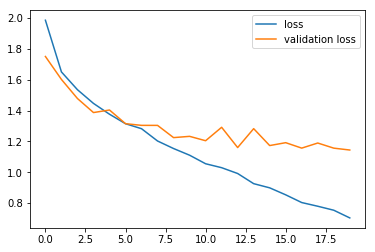

In [29]:
# plot the loss and validation loss to observe the model performance
plt.plot(model.history.history['loss'], label='loss')
plt.plot(model.history.history['val_loss'], label='validation loss')
plt.legend()

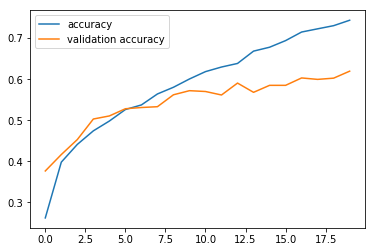

In [30]:
# plot the accuracy on Train and Test to observe the model performance
plt.plot(model.history.history['accuracy'], label='accuracy')
plt.plot(model.history.history['val_accuracy'], 
         label='validation accuracy')
plt.legend()

<a id='metrices_stridedCNN'></a>
General overview of the performance of the model with Strided CNN using Confusion Metrix.

[0.00300641 0.01430029 0.06646418 0.33525616 0.00566723 0.47731566
 0.09012265 0.00288715 0.00435211 0.00062818]
5
[[664  29  55  18  17   8  19  18 124  48]
 [ 28 719  12  11   4   3  14   4  38 167]
 [ 69  11 468  73  75  99  95  56  29  25]
 [ 35  13  98 361  47 219 110  56  21  40]
 [ 43  13 135  56 435  58 115 117  16  12]
 [ 21   6  64 161  40 523  69  78  18  20]
 [ 11  14  44  64  40  24 745  21   9  28]
 [ 22   9  33  42  58  84  18 685   9  40]
 [100  66  16  15   6  12  13  13 702  57]
 [ 48 127   9   9   5  13  25  18  33 713]]


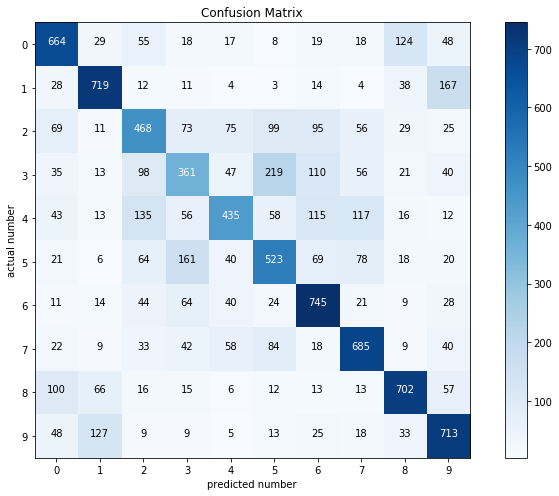

In [31]:
# 

from sklearn.metrics import confusion_matrix
import itertools

def my_confusion_matrix(con_mat, cls, title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    This Function shows the confusion matrix in a nice format and color.
        
    return:
        It returns nothing and only plot the matrix in a nice format.
    """
    
    #print(con_mat)
    
    plt.figure(figsize=(10,7))
    plt.imshow(con_mat, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    plt.xticks(np.arange(10))
    plt.yticks(np.arange(10))
    
    plt.xlabel('predicted number')
    plt.ylabel('actual number')
    
    #print(range(con_mat.shape[0], con_mat.shape[1]))
    for i, j in itertools.product(range(con_mat.shape[0]), range(con_mat.shape[1])):
        #print(con_mat[i,j])
        plt.text(j, i, con_mat[i,j], 
                 horizontalalignment='center', 
                 color='white' if  i==j else 'black')
    
    plt.tight_layout()
    plt.show()
    
pred = model.predict(X_test)
print(pred[0])

pred_arg = pred.argmax(axis=1)
print(pred_arg[0])

con_mat = confusion_matrix(y_test, pred_arg)
print(con_mat)

my_confusion_matrix(con_mat, list(range(10)))

<a id='CNN_pool'></a>
CNN model with pooling.

In [37]:
# make the model using the Functional API approach
# In the first LAYER => Input needs the shape of A SINGLE FIGURE
# in this case np.shape(X_train[0]) = (32, 32, 3)
i = Input(shape=np.shape(X_train[0]))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = MaxPooling2D(pool_size=(2,2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(cls, activation='softmax')(x)

In [38]:
# make the model
model = Model(i, x)

# compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# fit the model to the training data
# and validate the model against validation data
# batchsize = number of batches for each SGD step in the training
model.fit(X_train[:10000], y_train[:10000], 
          validation_data=(X_test[:2000], y_test[:2000]), 
          epochs=20, 
          batch_size=128)

Train on 10000 samples, validate on 2000 samples
Epoch 1/20
10000/10000 [==============================] - 16s 2ms/sample - loss: 1.9565 - accuracy: 0.2764 - val_loss: 1.7423 - val_accuracy: 0.3605
Epoch 2/20
10000/10000 [==============================] - 14s 1ms/sample - loss: 1.5772 - accuracy: 0.4241 - val_loss: 1.5364 - val_accuracy: 0.4515
Epoch 3/20
10000/10000 [==============================] - 14s 1ms/sample - loss: 1.4690 - accuracy: 0.4594 - val_loss: 1.3520 - val_accuracy: 0.5230
Epoch 4/20
10000/10000 [==============================] - 14s 1ms/sample - loss: 1.3504 - accuracy: 0.5090 - val_loss: 1.3642 - val_accuracy: 0.5035
Epoch 5/20
10000/10000 [==============================] - 15s 1ms/sample - loss: 1.2603 - accuracy: 0.5417 - val_loss: 1.2309 - val_accuracy: 0.5580
Epoch 6/20
10000/10000 [==============================] - 15s 1ms/sample - loss: 1.1940 - accuracy: 0.5708 - val_loss: 1.2237 - val_accuracy: 0.5575
Epoch 7/20
10000/10000 [==============================] -

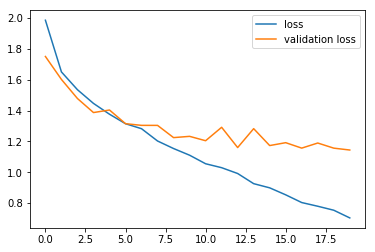

In [36]:
# plot the loss and validation loss to observe the model performance
plt.plot(model.history.history['loss'], label='loss')
plt.plot(model.history.history['val_loss'], label='validation loss')
plt.legend()

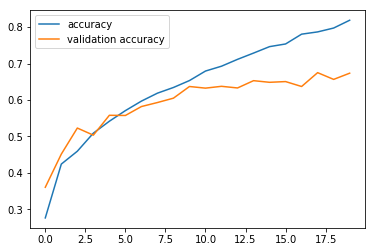

In [39]:
# plot the accuracy on Train and Test to observe the model performance
plt.plot(model.history.history['accuracy'], label='accuracy')
plt.plot(model.history.history['val_accuracy'], 
         label='validation accuracy')
plt.legend()

<a id='metrices_CNN_pool'></a>
General overview of the performance of the CNN model with pooling using Confusion Metrix.

[1.4055133e-03 1.3070287e-04 8.2141813e-03 8.7423003e-01 7.4406690e-04
 9.3878910e-02 4.4671232e-03 4.0737030e-04 1.6453370e-02 6.8628840e-05]
3
[[762  17  28  13  11   4   5  17 114  29]
 [ 39 775   6   9   2   4   6   9  49 101]
 [ 99   5 519  52  96  91  46  45  31  16]
 [ 49   8  89 373  79 241  46  54  33  28]
 [ 42   3 102  45 577  53  41 111  21   5]
 [ 28   1  69 108  51 621  26  62  26   8]
 [ 14   9  56  75  56  43 694  15  23  15]
 [ 19   1  28  27  55  76   5 759  10  20]
 [ 59  19   8   6   4   5   1   5 869  24]
 [ 51  94   5  18   5  12   4  19  52 740]]


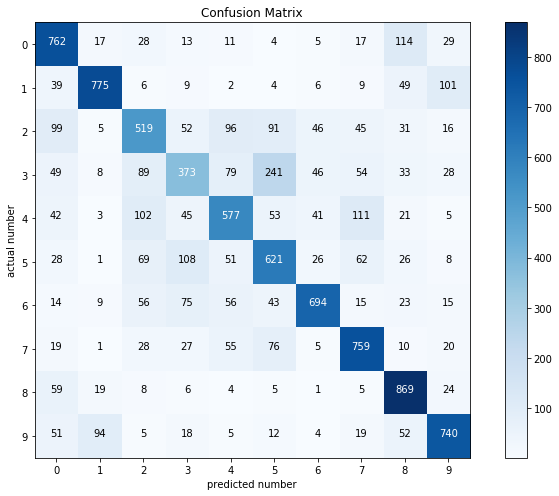

In [40]:
# 

from sklearn.metrics import confusion_matrix
import itertools

def my_confusion_matrix(con_mat, cls, title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    This Function shows the confusion matrix in a nice format and color.
        
    return:
        It returns nothing and only plot the matrix in a nice format.
    """
    
    #print(con_mat)
    
    plt.figure(figsize=(10,7))
    plt.imshow(con_mat, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    plt.xticks(np.arange(10))
    plt.yticks(np.arange(10))
    
    plt.xlabel('predicted number')
    plt.ylabel('actual number')
    
    #print(range(con_mat.shape[0], con_mat.shape[1]))
    for i, j in itertools.product(range(con_mat.shape[0]), range(con_mat.shape[1])):
        #print(con_mat[i,j])
        plt.text(j, i, con_mat[i,j], 
                 horizontalalignment='center', 
                 color='white' if  i==j else 'black')
    
    plt.tight_layout()
    plt.show()
    
pred = model.predict(X_test)
print(pred[0])

pred_arg = pred.argmax(axis=1)
print(pred_arg[0])

con_mat = confusion_matrix(y_test, pred_arg)
print(con_mat)

my_confusion_matrix(con_mat, list(range(10)))

<a id='DataAugmentation'></a>
Add the Data Augmentation to improve the model.

In [ ]:
# make the model using the Functional API approach
# In the first LAYER => Input needs the shape of A SINGLE FIGURE
# in this case np.shape(X_train[0]) = (32, 32, 3)
i = Input(shape=np.shape(X_train[0]))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = MaxPooling2D(pool_size=(2,2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(cls, activation='softmax')(x)

In [ ]:
# make the model
model = Model(i, x)

# compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# fit the model to the training data
# and validate the model against validation data
# batchsize = number of batches for each SGD step in the training
model.fit(X_train[:10000], y_train[:10000], 
          validation_data=(X_test[:2000], y_test[:2000]), 
          epochs=20, 
          batch_size=128)

In [ ]:
# plot the loss and validation loss to observe the model performance
plt.plot(model.history.history['loss'], label='loss')
plt.plot(model.history.history['val_loss'], label='validation loss')
plt.legend()

In [ ]:
# plot the accuracy on Train and Test to observe the model performance
plt.plot(model.history.history['accuracy'], label='accuracy')
plt.plot(model.history.history['val_accuracy'], 
         label='validation accuracy')
plt.legend()

<a id='metricesAugmentation'></a>

In [ ]:
# 

from sklearn.metrics import confusion_matrix
import itertools

def my_confusion_matrix(con_mat, cls, title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    This Function shows the confusion matrix in a nice format and color.
        
    return:
        It returns nothing and only plot the matrix in a nice format.
    """
    
    #print(con_mat)
    
    plt.figure(figsize=(10,7))
    plt.imshow(con_mat, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    plt.xticks(np.arange(10))
    plt.yticks(np.arange(10))
    
    plt.xlabel('predicted number')
    plt.ylabel('actual number')
    
    #print(range(con_mat.shape[0], con_mat.shape[1]))
    for i, j in itertools.product(range(con_mat.shape[0]), range(con_mat.shape[1])):
        #print(con_mat[i,j])
        plt.text(j, i, con_mat[i,j], 
                 horizontalalignment='center', 
                 color='white' if  i==j else 'black')
    
    plt.tight_layout()
    plt.show()
    
pred = model.predict(X_test)
print(pred[0])

pred_arg = pred.argmax(axis=1)
print(pred_arg[0])

con_mat = confusion_matrix(y_test, pred_arg)
print(con_mat)

my_confusion_matrix(con_mat, list(range(10)))

<a id='BatchNormalization'></a>
Add the Batch Normalization to improve the model.

In [ ]:
# plot the loss and validation loss to observe the model performance
plt.plot(model.history.history['loss'], label='loss')
plt.plot(model.history.history['val_loss'], label='validation loss')
plt.legend()

In [ ]:
# plot the accuracy on Train and Test to observe the model performance
plt.plot(model.history.history['accuracy'], label='accuracy')
plt.plot(model.history.history['val_accuracy'], 
         label='validation accuracy')
plt.legend()

<a id='metricesBatchNormalization'></a>
Add BatchNormalization to improve the model.

In [44]:
# make the model using the Functional API approach
# In the first LAYER => Input needs the shape of A SINGLE FIGURE
# in this case np.shape(X_train[0]) = (32, 32, 3)
i = Input(shape=np.shape(X_train[0]))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(cls, activation='softmax')(x)

In [45]:
# make the model
model = Model(i, x)

# compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# fit the model to the training data
# and validate the model against validation data
# batchsize = number of batches for each SGD step in the training
model.fit(X_train[:10000], y_train[:10000], 
          validation_data=(X_test[:2000], y_test[:2000]), 
          epochs=20, 
          batch_size=128)

Train on 10000 samples, validate on 2000 samples
Epoch 1/20
10000/10000 [==============================] - 24s 2ms/sample - loss: 2.2486 - accuracy: 0.3328 - val_loss: 5.0862 - val_accuracy: 0.1420
Epoch 2/20
10000/10000 [==============================] - 24s 2ms/sample - loss: 1.5246 - accuracy: 0.4455 - val_loss: 5.7917 - val_accuracy: 0.1940
Epoch 3/20
10000/10000 [==============================] - 24s 2ms/sample - loss: 1.3720 - accuracy: 0.5019 - val_loss: 4.8862 - val_accuracy: 0.2615
Epoch 4/20
10000/10000 [==============================] - 24s 2ms/sample - loss: 1.2449 - accuracy: 0.5515 - val_loss: 3.7834 - val_accuracy: 0.2995
Epoch 5/20
10000/10000 [==============================] - 23s 2ms/sample - loss: 1.1492 - accuracy: 0.5836 - val_loss: 2.3251 - val_accuracy: 0.3515
Epoch 6/20
10000/10000 [==============================] - 26s 3ms/sample - loss: 1.0550 - accuracy: 0.6208 - val_loss: 1.7076 - val_accuracy: 0.4710
Epoch 7/20
10000/10000 [==============================] -

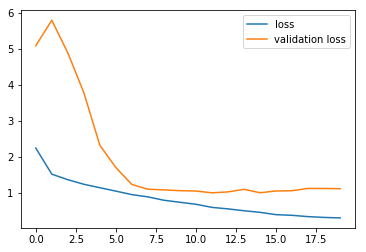

In [46]:
# plot the loss and validation loss to observe the model performance
plt.plot(model.history.history['loss'], label='loss')
plt.plot(model.history.history['val_loss'], label='validation loss')
plt.legend()

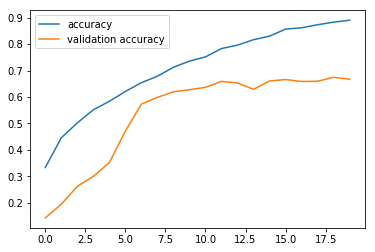

In [47]:
# plot the accuracy on Train and Test to observe the model performance
plt.plot(model.history.history['accuracy'], label='accuracy')
plt.plot(model.history.history['val_accuracy'], 
         label='validation accuracy')
plt.legend()

<a id='metricesBatchNormalization'></a>

[2.7440174e-03 1.3449245e-04 2.5277629e-01 5.7602054e-01 1.0135476e-05
 1.0854351e-01 4.3120988e-02 7.9431644e-05 1.6525606e-02 4.4959368e-05]
3
[[748  15  77  17   5   3  19   9  75  32]
 [ 34 768  14  19   0  11  15   3  59  77]
 [ 75   3 667  52  41  53  80  13  11   5]
 [ 27   5 135 472  38 147 138  17  16   5]
 [ 40   1 173  81 487  33 119  52  14   0]
 [ 27   2 140 207  30 474  76  32   9   3]
 [  9   6  62  40  10  11 855   1   6   0]
 [ 21   2  77  61  79  74  27 649   4   6]
 [ 78  29  21  19   4   3   8   1 825  12]
 [ 49  96  16  29   8  13  22  20  55 692]]


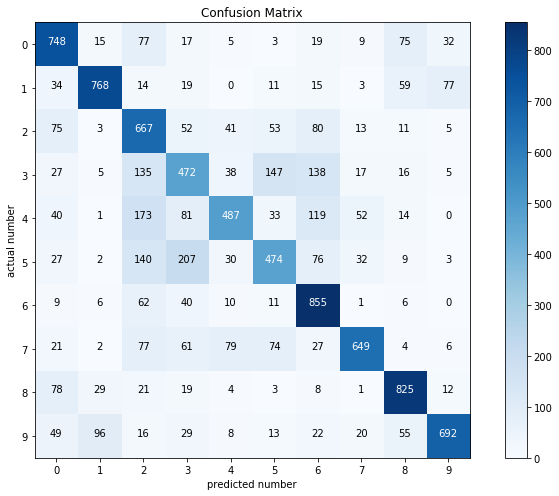

In [48]:
# 

from sklearn.metrics import confusion_matrix
import itertools

def my_confusion_matrix(con_mat, cls, title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    This Function shows the confusion matrix in a nice format and color.
        
    return:
        It returns nothing and only plot the matrix in a nice format.
    """
    
    #print(con_mat)
    
    plt.figure(figsize=(10,7))
    plt.imshow(con_mat, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    plt.xticks(np.arange(10))
    plt.yticks(np.arange(10))
    
    plt.xlabel('predicted number')
    plt.ylabel('actual number')
    
    #print(range(con_mat.shape[0], con_mat.shape[1]))
    for i, j in itertools.product(range(con_mat.shape[0]), range(con_mat.shape[1])):
        #print(con_mat[i,j])
        plt.text(j, i, con_mat[i,j], 
                 horizontalalignment='center', 
                 color='white' if  i==j else 'black')
    
    plt.tight_layout()
    plt.show()
    
pred = model.predict(X_test)
print(pred[0])

pred_arg = pred.argmax(axis=1)
print(pred_arg[0])

con_mat = confusion_matrix(y_test, pred_arg)
print(con_mat)

my_confusion_matrix(con_mat, list(range(10)))